### <span style="color:red"> Name: Chorten Tsomo Tamang </span>  

## Handwritten Digits Classification

Handwritten digit classification is a fundamental problem in the field of machine learning and computer vision. This notebook aims to develop a classification model using various machine learning techniques to classify images of handwritten digits from the MNIST dataset.

Dataset Overview
The MNIST dataset contains two main parts: train.csv for training and test.csv for testing. Each image in these datasets is represented as a grid of 28x28 pixels (784 pixels in total).

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
# Load datasets
train_df = pd.read_csv('../data/digit-recognizer/train.csv')
test_df = pd.read_csv('../data/digit-recognizer/test.csv')

In [9]:
# Display dataset sizes
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (42000, 785)
Test set size: (28000, 784)


The training dataset contains 42,000 images of handwritten digits, where each image is represented by 784 pixel values (28x28 pixels). Additionally, each image in the training set has a corresponding label indicating the digit it represents.

In contrast, the test dataset includes 28,000 images, each also represented by 784 pixel values, but without the accompanying labels. The goal is to predict these labels using trained models.


##### Traget Varaible

The training dataset includes labels ranging from 0 to 9, indicating the digit depicted in each image.

In [10]:
# Display unique labels in training data
unique_labels = train_df['label'].unique()
print(f"Unique labels: {sorted(unique_labels)}")

Unique labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


##### Exploratory Data Analysis

Exploring the dataset to understand its characteristics, such as visualizing sample images, checking class distribution, and examining pixel value distributions.

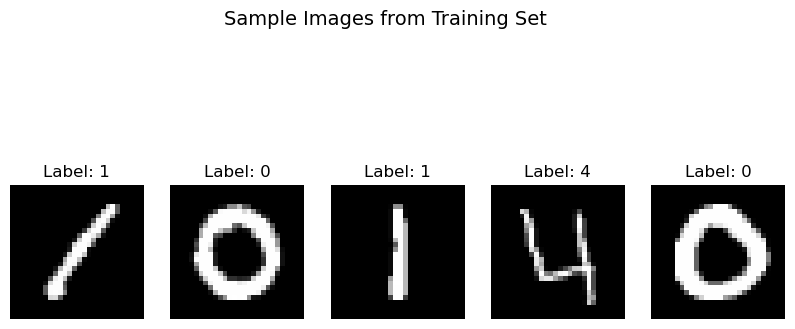

In [12]:
# Sample images visualization
sample_images = train_df.drop('label', axis=1).values.reshape(-1, 28, 28)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'Label: {train_df.iloc[i, 0]}')
    plt.axis('off')
plt.suptitle('Sample Images from Training Set', fontsize=14)
plt.show()


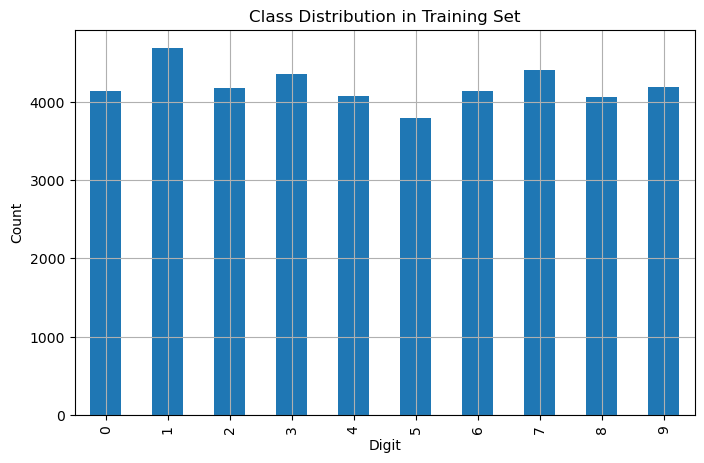

In [13]:
# Class distribution
plt.figure(figsize=(8, 5))
train_df['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [14]:
# Checking for missing data
missing_data_train = train_df.isnull().sum().sum()
missing_data_test = test_df.isnull().sum().sum()

print(f"Missing data in training set: {missing_data_train}")
print(f"Missing data in test set: {missing_data_test}")


Missing data in training set: 0
Missing data in test set: 0


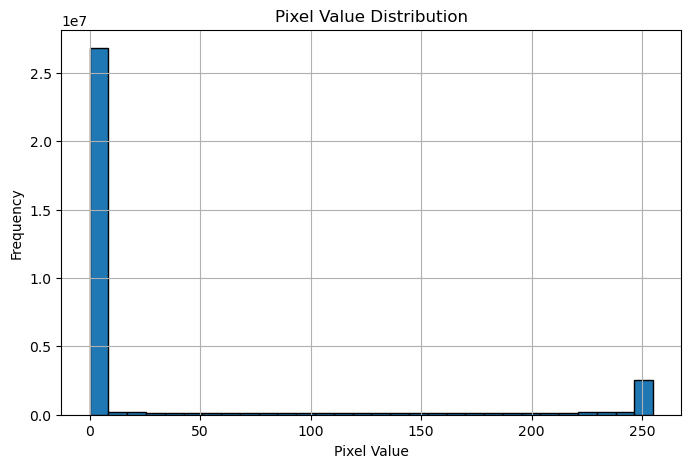

In [15]:
# Pixel value distribution
plt.figure(figsize=(8, 5))
plt.hist(train_df.drop('label', axis=1).values.flatten(), bins=30, range=(0, 255), edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Sample Images and Labels: We start by looking at some sample images from the training set and their corresponding labels (0 to 9).

Class Distribution: We examine how many images we have for each digit. It's important to ensure that our dataset is balanced, meaning we have roughly the same number of examples for each digit.

Pixel Value Distribution: Each pixel in the images has a value between 0 and 255, representing its brightness. We check how these pixel values are distributed across the dataset.

##### Data Processing

Preparing the dataset for model training by normalizing pixel values and splitting into training and validation sets.

Normalization: Before training our models, we normalize the pixel values. This step ensures that all pixel values are scaled to a range between 0 and 1. This makes training the models faster and more stable.

Train-Validation Split: We split our training data into two parts: one for training the model (X_train and y_train) and another for validating its performance (X_val and y_val). This helps us evaluate how well our model generalizes to new, unseen data.

In [16]:
# Normalizing pixel values
train_images = train_df.drop('label', axis=1).values.reshape(-1, 28, 28) / 255.0
test_images = test_df.values.reshape(-1, 28, 28) / 255.0

In [17]:
# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_df['label'], test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 33600
Validation set size: 8400


Training set size: After splitting, X_train contains 33,600 images, which are used to train the machine learning models.
Validation set size: X_val contains 8,400 images. These are used to evaluate the performance of the models during training, ensuring they generalize well to unseen data.
This division into training and validation sets helps in assessing the model's performance accurately and avoiding overfitting by ensuring the model hasn't just memorized the training data but can generalize to new, unseen examples effectively.

##### Model Selection and Training

Explore different models for classification, including K-Nearest Neighbors (KNN) and Convolutional Neural Networks (CNN).

In [20]:
# Define and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.reshape(-1, 784), y_train)

# Evaluate on validation set
y_pred_val_knn = knn.predict(X_val.reshape(-1, 784))
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)
print(f"KNN Accuracy on Validation Set: {accuracy_knn:.4f}")

KNN Accuracy on Validation Set: 0.9649


This code initializes and trains a K-Nearest Neighbors (KNN) model with 5 neighbors to classify handwritten digit images. It evaluates the model's accuracy on a validation set, achieving an accuracy of 96.49%. KNN works by finding the most common label among its nearest neighbors in the training data, making it straightforward yet effective for image classification tasks like this one.

##### CNN Model

In [22]:
# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\tsomo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile and train CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train[..., np.newaxis], y_train,
                    validation_data=(X_val[..., np.newaxis], y_val),
                    epochs=10, batch_size=128)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7988 - loss: 0.7312 - val_accuracy: 0.9680 - val_loss: 0.1104
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9712 - loss: 0.0927 - val_accuracy: 0.9714 - val_loss: 0.0923
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9823 - loss: 0.0600 - val_accuracy: 0.9796 - val_loss: 0.0629
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9860 - loss: 0.0465 - val_accuracy: 0.9830 - val_loss: 0.0534
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9854 - val_loss: 0.0456
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9917 - loss: 0.0283 - val_accuracy: 0.9867 - val_loss: 0.0414
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9823 - val_loss: 0.0565
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accu

 Convolutional Neural Network (CNN) architecture for classifying handwritten digits. The model consists of convolutional and pooling layers to extract features, followed by dense layers for classification. It uses the Adam optimizer and sparse categorical cross-entropy loss for training. The training process involves 10 epochs, achieving high accuracy on both training and validation sets, with validation accuracy reaching 98.79% by the end of training. Each epoch processes the data in batches of 128 samples, showing efficient learning and good generalization capability for digit recognition tasks.

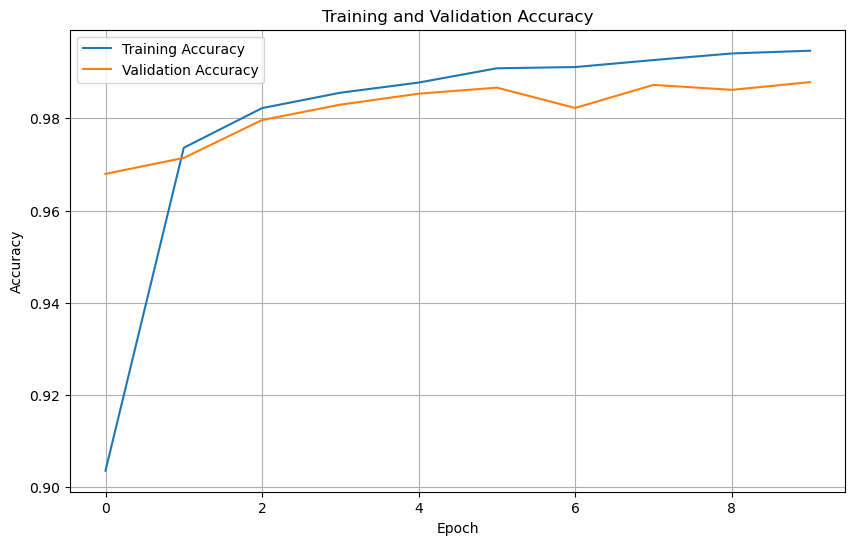

In [24]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Evaluate CNN on validation set
val_loss, val_accuracy = model.evaluate(X_val[..., np.newaxis], y_val)
print(f"CNN Validation Accuracy: {val_accuracy:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9860 - loss: 0.0467
CNN Validation Accuracy: 0.9879


the trained Convolutional Neural Network (CNN) model on the validation set. It computes the validation loss and accuracy metrics, which are essential for assessing how well the model performs on unseen data.

Validation Loss: Represents the error between the predicted and actual values on the validation set. Lower values indicate better performance.

Validation Accuracy: Indicates the proportion of correctly classified images in the validation set. It shows how accurately the model predicts the digit labels.

The printed output shows that the CNN achieved a validation accuracy of 98.79%, meaning it correctly classified approximately 98.79% of the images in the validation set.

##### Performance Comparision

Comparing the performance metrics of different models, including accuracy and computational efficiency.

In [26]:
# Compare KNN and CNN performances
knn_accuracy = accuracy_knn
cnn_accuracy = val_accuracy

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

KNN Accuracy: 0.9649
CNN Accuracy: 0.9879


The performance of two different models, K-Nearest Neighbors (KNN) and Convolutional Neural Network (CNN), in classifying handwritten digits from the MNIST dataset.

KNN Accuracy: Represents the accuracy of the KNN model on the validation set, which is 96.49%. This means KNN correctly predicted around 96.49% of the digit labels.

CNN Accuracy: Shows the accuracy of the CNN model on the same validation set, which is 98.79%. This indicates that the CNN correctly classified approximately 98.79% of the digit images, outperforming the KNN model.

The CNN achieved higher accuracy compared to KNN, demonstrating its superior performance in this classification task.